In [1]:
#Importing libraries
# !pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

# Data Transformation

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df = pd.get_dummies(data=df, columns=['Geography','Gender'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


# Model Building

In [6]:
sc = StandardScaler()
x = df.drop(columns=['Exited'])
y = df['Exited']

In [7]:
x = sc.fit_transform(x)
x

array([[-0.32622142,  0.29351742, -1.04175968, ..., -0.57380915,
         1.09598752, -1.09598752],
       [-0.44003595,  0.19816383, -1.38753759, ...,  1.74273971,
         1.09598752, -1.09598752],
       [-1.53679418,  0.29351742,  1.03290776, ..., -0.57380915,
         1.09598752, -1.09598752],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -0.57380915,
         1.09598752, -1.09598752],
       [ 1.25683526,  0.29351742, -0.69598177, ..., -0.57380915,
        -0.91241915,  0.91241915],
       [ 1.46377078, -1.04143285, -0.35020386, ..., -0.57380915,
         1.09598752, -1.09598752]])

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=1)

In [ ]:
#Initialize model
ann = Sequential()

#Add hidden layer
ann.add(Dense(units=10,activation='relu'))

#Add output layer
ann.add(Dense(units=1, activation='sigmoid'))

#Establish the connection between the layers
ann.compile(optimizer = 'adadelta',loss='binary_crossentropy',metrics='accuracy')

#Fit the data
ann.fit(xtrain,ytrain, epochs=100)

In [10]:
ypred = ann.predict(xtest)
ypred

63/63 [==============================] - 0s 746us/step


array([[0.48791063],
       [0.29771054],
       [0.5520844 ],
       ...,
       [0.36098385],
       [0.39856818],
       [0.8058925 ]], dtype=float32)

In [13]:
ypred > 0.5

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [14]:
ypred = ypred > 0.5
ypred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [12]:
ytest

9953    0
3850    0
4962    0
3886    0
5437    0
       ..
3919    0
162     0
7903    0
2242    0
2745    0
Name: Exited, Length: 2000, dtype: int64

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68      1585
           1       0.26      0.57      0.35       415

    accuracy                           0.57      2000
   macro avg       0.54      0.57      0.51      2000
weighted avg       0.71      0.57      0.61      2000



In [16]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Hyperparameter Tuning

In [ ]:
!pip install -U keras-tuner

# **Tuning the ANN Model**




In [18]:
import keras_tuner as kt

Using TensorFlow backend


In [19]:
def optimizer_selection(hp):
    #initialize the model
    model = Sequential()
    #Add hidden layer
    model.add(Dense(units=10, activation='relu'))
    #Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
    #Optimizer selection
    optim = hp.Choice('optimizer', values = ['sgd','adam','rmsprop'])
    model.compile(optimizer=optim, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [20]:
tuner = kt.RandomSearch(
    optimizer_selection,
    objective='val_accuracy',
    max_trials=3
)

In [21]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

Trial 3 Complete [00h 00m 02s]
val_accuracy: 0.8080000281333923

Best val_accuracy So Far: 0.8159999847412109
Total elapsed time: 00h 00m 07s


In [22]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [23]:
model = tuner.get_best_models(num_models=1)[0]
model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8159 - val_loss: 0.4153 - val_accuracy: 0.8190
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8214 - val_loss: 0.4059 - val_accuracy: 0.8255
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8281 - val_loss: 0.3963 - val_accuracy: 0.8335
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8338 - val_loss: 0.3869 - val_accuracy: 0.8430
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8401 - val_loss: 0.3766 - val_accuracy: 0.8490
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8457 - val_loss: 0.3690 - val_accuracy: 0.8510
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8501 - val_loss: 0.3642 - val_accuracy: 0.8520

# Regression

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Regression.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130012,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720993,1001.451646,998.847605
998,403.315576,1000.771023,998.562851


In [25]:
x = df.iloc[:,1:]
y = df['price']

In [26]:
x = sc.fit_transform(x)
x

array([[-0.23277509, -0.22551031],
       [-1.18389307,  1.12100979],
       [ 0.05762098, -1.19831827],
       ...,
       [ 1.47655818, -1.19452982],
       [ 0.77742978, -1.49494959],
       [-0.80318737,  1.55251428]])

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [39]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1))

ann.compile(optimizer='adam',loss = 'mse')

ann.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
25/25 [==============================] - 1s 6ms/step - loss: 255551.9844 - val_loss: 262254.7500
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 254864.7969 - val_loss: 261412.3125
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 253764.6875 - val_loss: 260057.2656
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 252025.1875 - val_loss: 257935.1250
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 249377.6406 - val_loss: 254725.8594
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 245470.7344 - val_loss: 250035.8594
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 239830.4062 - val_loss: 243545.4844
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 232286.9531 - val_loss: 234850.0781
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 222538.6250 - val_loss: 223879.2188
Epoch 10/100
25/25 

In [35]:
yp = ann.predict(xtest)
yp

7/7 [==============================] - 0s 2ms/step


array([[482.72263],
       [528.2099 ],
       [497.32098],
       [533.73285],
       [651.0001 ],
       [331.2294 ],
       [342.52026],
       [365.13745],
       [710.0408 ],
       [499.98795],
       [480.66135],
       [511.41644],
       [498.20828],
       [357.4315 ],
       [548.80945],
       [498.3113 ],
       [573.4069 ],
       [549.98566],
       [486.65646],
       [503.3487 ],
       [474.84995],
       [600.03186],
       [446.05658],
       [580.7595 ],
       [430.80768],
       [524.4208 ],
       [376.11612],
       [506.60446],
       [544.50415],
       [342.8699 ],
       [443.34998],
       [640.16235],
       [557.9542 ],
       [536.5635 ],
       [604.69684],
       [544.12476],
       [414.79254],
       [572.21674],
       [563.9856 ],
       [518.0888 ],
       [427.33978],
       [723.8088 ],
       [527.3196 ],
       [533.7047 ],
       [513.0495 ],
       [458.48474],
       [523.3379 ],
       [531.18787],
       [585.9141 ],
       [471.956  ],


In [40]:
ann.history.history

{'loss': [255551.984375,
  254864.796875,
  253764.6875,
  252025.1875,
  249377.640625,
  245470.734375,
  239830.40625,
  232286.953125,
  222538.625,
  210509.15625,
  196324.625,
  179995.8125,
  162005.546875,
  142686.109375,
  122808.0078125,
  102936.25,
  83966.7265625,
  66629.15625,
  51392.10546875,
  38793.921875,
  28783.150390625,
  21356.025390625,
  16174.771484375,
  12653.29296875,
  10418.5390625,
  8974.31640625,
  8017.6455078125,
  7375.75,
  6859.0439453125,
  6453.294921875,
  6097.51123046875,
  5760.2880859375,
  5443.9931640625,
  5137.86083984375,
  4843.86572265625,
  4569.927734375,
  4297.07568359375,
  4040.4091796875,
  3792.107177734375,
  3558.852294921875,
  3341.504638671875,
  3127.4814453125,
  2937.909912109375,
  2745.892578125,
  2566.726318359375,
  2402.738037109375,
  2250.227294921875,
  2103.049072265625,
  1968.556396484375,
  1843.16357421875,
  1722.5592041015625,
  1611.8731689453125,
  1512.115966796875,
  1416.189697265625,
  1325.2

In [41]:
#'history.history' function stores the training loss and test loss in dictionary format.
loss = pd.DataFrame(ann.history.history)
loss

,loss,val_loss
0,255551.984375,262254.750000
1,254864.796875,261412.312500
2,253764.687500,260057.265625
3,252025.187500,257935.125000
4,249377.640625,254725.859375
...,...,...
95,197.987808,206.221375
96,191.609192,199.444260
97,185.465515,194.334213
98,180.320465,189.424881


<Axes: >

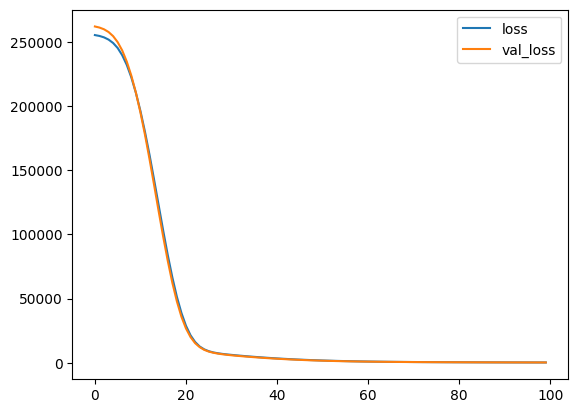

In [42]:
loss.plot()

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(ytest,yp)

0.9719214177032836